# FINAL PROJECT DATA SCIENCE TEAM FINLANDIA

Project yang akan dikerjakan adalah memecahkan persoalan customer dari perusahaan Fashion Campus dimana customer banyak yang tidak kembali lagi ke platform untuk melakukan transaksi. Sehingga tim ds ditugaskan untuk menganalisa kejadian ini dengan membuat churn prediction model yang akan ditujukan oleh stakeholder yang ingin mengetahui probabilitas user terhadap churn pada satu bulan yang akan datang, serta mereka juga ingin mengetahui seberapa akurat model yang dibuat dikarenakan ini akan berdampak pada keputusan strategi yang akan dibuat tim marketing dan juga tim bisnis.

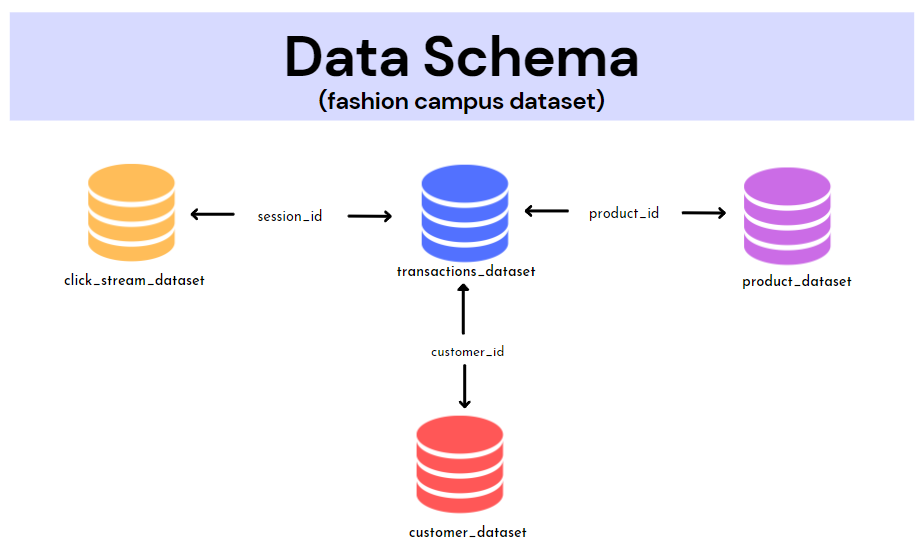

## Import library

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip install squarify

In [ ]:
# melakukan import library yang dibutuhkan
import pandas as pd
import numpy as np
from datetime import datetime, date

## Read the dataset

In [ ]:
# membaca dataset csv

# product
df_product = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/dataset/product2.csv')

# customer
df_customer = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/dataset/customer.csv')

# click stream
df_click_stream = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/dataset/click_stream_jan20_jul22.csv')

# transaction
df_transactions = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/dataset/transaksi_jan20_jul22.csv')


In [ ]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:
# melihat info data setiap dataset
data = [df_product, df_customer, df_click_stream, df_transactions]

print('click_stream :\n', df_click_stream.shape)
print(df_click_stream.isnull().sum())

for i in data:
  print(i.info())

click_stream :
 (9381740, 7)
Unnamed: 0              0
session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    6299959
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          44446 non-null  int64  
 1   id                  44446 non-null  int64  
 2   productGender       44446 non-null  object 
 3   masterCategory      44446 non-null  object 
 4   subCategory         44446 non-null  object 
 5   articleType         44446 non-null  object 
 6   baseColour          44431 non-null  object 
 7   season              44425 non-null  object 
 8   year                44445 non-null  float64
 9   usage               44129 non-null  object 
 10  productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(2), 

In [ ]:
# menghapus kolom tidak berguna
df_product.drop('Unnamed: 0', axis=1, inplace=True)
df_click_stream.drop('Unnamed: 0', axis=1, inplace=True)
df_transactions.drop('Unnamed: 0', axis=1, inplace=True)

# mengganti atribut id pada dataset produk menjadi product_id
df_product = df_product.rename(columns={'id': 'product_id'})

In [ ]:
df_click_stream.head(20)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,57450e55-19b2-4633-a527-dfe93f5c65c4,HOMEPAGE,2020-01-07T13:48:05.425431Z,a53d8b8b-857e-48e0-8a03-dbab4a1df74e,MOBILE,NaN
1,57450e55-19b2-4633-a527-dfe93f5c65c4,ADD_TO_CART,2020-01-07T13:57:04.425431Z,2119e985-ac1c-4c6e-bfcc-26040fbc1a67,MOBILE,"{'product_id': 30145, 'quantity': 1, 'item_pri..."
2,57450e55-19b2-4633-a527-dfe93f5c65c4,ADD_PROMO,2020-01-07T14:06:41.425431Z,2213a360-774a-4c71-94d4-939152e84990,MOBILE,"{'promo_code': 'BUYMORE', 'promo_amount': 6961}"
3,57450e55-19b2-4633-a527-dfe93f5c65c4,BOOKING,2020-01-07T14:36:15.425431Z,b9fe3c54-f72c-4590-bf33-9dcc4694475e,MOBILE,{'payment_status': 'Success'}
4,57450e55-19b2-4633-a527-dfe93f5c65c4,CLICK,2020-01-07T13:58:01.425431Z,145c79e9-edbb-403f-b4c6-a260919b0d95,MOBILE,NaN
5,57450e55-19b2-4633-a527-dfe93f5c65c4,SCROLL,2020-01-07T14:07:50.425431Z,5c97ea80-3c50-4765-8aa3-4f3526df32ce,MOBILE,NaN
6,4f6be202-bd51-4d2c-9e42-383600cecf6b,HOMEPAGE,2020-01-12T01:49:19.425431Z,c60da4ed-bcce-4683-9faa-cf8dc84b086e,MOBILE,NaN
7,4f6be202-bd51-4d2c-9e42-383600cecf6b,ADD_TO_CART,2020-01-12T12:29:54.425431Z,0812a8db-5b7e-46c6-aea9-16aa79c0e4ed,MOBILE,"{'product_id': 48031, 'quantity': 1, 'item_pri..."
8,4f6be202-bd51-4d2c-9e42-383600cecf6b,ADD_PROMO,2020-01-12T23:06:24.425431Z,9f1e8295-8b5a-4e3e-80e8-4d83dce1e03b,MOBILE,"{'promo_code': 'BUYMORE', 'promo_amount': 2066}"
9,4f6be202-bd51-4d2c-9e42-383600cecf6b,BOOKING,2020-01-15T14:45:23.425431Z,fc5df85a-ba78-4f22-bf9c-5f46e7072e54,MOBILE,{'payment_status': 'Success'}


In [ ]:
df_click_stream.isna().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    6299959
dtype: int64

# Data Preparation


## merge, handling missing value, formatting data

**Merge Data (Customer,Transaction, dan Product)**

In [ ]:
#Add columns
df_click_stream['event_year'] = pd.to_datetime(df_click_stream['event_time']).dt.year
df_click_stream['event_month'] = pd.to_datetime(df_click_stream['event_time']).dt.month

In [ ]:
# melakukan merge pada data customer, transaksi dan produk
df_master = pd.merge(left = df_customer, right = df_transactions, on= 'customer_id', how = 'left')
df_master = pd.merge(left = df_master, right = df_product, on='product_id', how = 'left')

**Formatting Data**

In [ ]:
# mengubah zona waktu UTC menjadi WIB
import pytz
from datetime import datetime

df_master['created_at'] = pd.to_datetime(df_master['created_at'])
# Mengonversi zona waktu menjadi zona waktu Indonesia (Asia/Jakarta)
df_master['created_at'] = df_master['created_at'].dt.tz_convert(pytz.timezone('Asia/Jakarta'))

df_click_stream['event_time'] = pd.to_datetime(df_click_stream['event_time'])
df_click_stream['event_time'] = df_click_stream['event_time'].dt.tz_convert(pytz.timezone('Asia/Jakarta'))

In [ ]:
#split timestamp to time, date, and month
# by time
df_master['order_time'] = pd.to_datetime(df_master['created_at']).dt.time

# by date
df_master['order_date'] = pd.to_datetime(df_master['created_at']).dt.date
df_master['order_date'] = df_master['order_date'].astype('datetime64')

# by year
df_master['order_month'] = pd.to_datetime(df_master['order_date']).dt.strftime("%Y-%m")

# by day
day_of_week = df_master['created_at'].dt.dayofweek
day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df_master['order_day'] = day_of_week.map(day_name)

#convert datatype
df_master['first_join_date'] = df_master['first_join_date'].astype('datetime64')


**Feature Engineering**

In [ ]:
#Region
def region(x):
  if x in ['Papua', 'Papua Barat']:
    return 'Papua'
  elif x in ['Maluku', 'Maluku Utara']:
    return 'Kepulauan Maluku'
  elif x in ['Sulawesi Tengah', 'Gorontalo', 'Sulawesi Utara', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat']:
    return 'Sulawesi'
  elif x in ['Bali', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat']:
    return 'Kepulauan Nusa Tenggara'
  elif x in ['Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Selatan', 'Kalimantan Barat']:
    return 'Kalimantan'
  elif x in ['Banten', 'Jawa Tengah', 'Jawa Timur', 'Jakarta Raya', 'Yogyakarta', 'Jawa Barat']:
    return 'Jawa'
  else:
    return 'Sulawesi'
df_master['home_region'] = df_master['home_location'].apply(region)

In [ ]:
# age customer
def age(born):
  born = datetime.strptime(born, "%Y-%m-%d").date()
  today = date.today()
  return today.year - born.year -((today.month, today.day) < (born.month, born.day))

df_master['age'] = df_master['birthdate'].apply(age)


In [ ]:
df_master['age'].max()
df_master['age'].min()

7

In [ ]:
# age range (rentang umur)
conditions = [
    (df_master['age'] < 12),
    (df_master['age']>=12) & (df_master['age']<=16),
    (df_master['age']>=17) & (df_master['age']<=25),
    (df_master['age']>=26) & (df_master['age']<=35),
    (df_master['age']>=36) & (df_master['age']<=45),
    (df_master['age']>=46) & (df_master['age']<=55),
    (df_master['age']>=56) & (df_master['age']<=65),
    (df_master['age']>65)
]

range = ['<12','12-16','17-25','26-35','36-45','46-55','56-65','>65']
df_master['age_range'] = np.select(conditions, range)

In [ ]:
df_master.rename(columns={'year':'year_product'}, inplace=True)

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972052 entries, 0 to 972051
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype                       
---  ------                  --------------   -----                       
 0   customer_id             972052 non-null  int64                       
 1   first_name              972052 non-null  object                      
 2   last_name               972052 non-null  object                      
 3   username                972052 non-null  object                      
 4   email                   972052 non-null  object                      
 5   gender                  972052 non-null  object                      
 6   birthdate               972052 non-null  object                      
 7   device_type             972052 non-null  object                      
 8   device_id               972052 non-null  object                      
 9   device_version          972052 non-null  object            

In [ ]:
# mengecek apakah ada data yang terduplikasi
is_duplicate = df_master.duplicated(subset=['customer_id', 'created_at'])
is_duplicate.value_counts()

False    677657
True     294395
dtype: int64

In [ ]:
# # menghapus data yang terduplikasi berdasarkan customer dan tanggal transaksi
df_master = df_master.drop_duplicates(subset=['customer_id', 'created_at'], keep='first')

In [ ]:
df_master['payment_status'].value_counts()

Success    596858
Failed      26861
Name: payment_status, dtype: int64

In [ ]:
# menyeleksi data berdasarkan status pembayaran yang sukses
options = ['Success']

# selecting rows based on condition
df_master = df_master[df_master['payment_status'].isin(options)]

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596858 entries, 2 to 972051
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype                       
---  ------                  --------------   -----                       
 0   customer_id             596858 non-null  int64                       
 1   first_name              596858 non-null  object                      
 2   last_name               596858 non-null  object                      
 3   username                596858 non-null  object                      
 4   email                   596858 non-null  object                      
 5   gender                  596858 non-null  object                      
 6   birthdate               596858 non-null  object                      
 7   device_type             596858 non-null  object                      
 8   device_id               596858 non-null  object                      
 9   device_version          596858 non-null  object            

In [ ]:
df_master.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,productGender,masterCategory,subCategory,articleType,baseColour,season,year_product,usage,productDisplayName,order_time,order_date,order_month,order_day,home_region,age,age_range
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-23 19:53:12.916342+07:00,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,"{'product_id': 18015, 'quantity': 1, 'item_pri...",LinkAja,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,18015.0,1.0,305982.0,Women,Accessories,Belts,Belts,Brown,Winter,2015.0,Casual,Lino Perros Women Solid Brown Belt,19:53:12.916342,2020-08-23,2020-08,Sunday,Kepulauan Nusa Tenggara,34,26-35
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08-31 20:34:59.916342+07:00,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,"{'product_id': 12449, 'quantity': 1, 'item_pri...",LinkAja,Success,0.0,NaN,10000.0,2020-09-04T05:49:01.977704Z,-6.281795,106.890417,391341.0,12449.0,1.0,381341.0,Unisex,Accessories,Shoe Accessories,Shoe Accessories,Brown,Fall,2011.0,NaN,Timberland Unisex Brown Shoe Accessories,20:34:59.916342,2020-08-31,2020-08,Monday,Kepulauan Nusa Tenggara,34,26-35
5,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-09-08 20:38:30.916342+07:00,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,"{'product_id': 25820, 'quantity': 1, 'item_pri...",LinkAja,Success,0.0,NaN,0.0,2020-09-14T11:26:20.142928Z,-8.631607,116.428436,154220.0,25820.0,1.0,154220.0,Women,Apparel,Topwear,Kurtas,Cream,Summer,2012.0,Ethnic,Diva Women Printed Cream Kurta,20:38:30.916342,2020-09-08,2020-09,Tuesday,Kepulauan Nusa Tenggara,34,26-35
6,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-09-16 20:48:09.916342+07:00,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,70d1c010-60e4-440a-80df-9efb0132cfb7,"{'product_id': 25157, 'quantity': 1, 'item_pri...",Debit Card,Success,0.0,NaN,10000.0,2020-09-19T22:38:44.292440Z,0.825219,123.396780,412502.0,25157.0,1.0,247557.0,Women,Accessories,Bags,Handbags,Black,Winter,2015.0,Casual,Lino Perros Women Leatherette Black Handbag,20:48:09.916342,2020-09-16,2020-09,Wednesday,Kepulauan Nusa Tenggara,34,26-35
10,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-10-02 20:46:24.916342+07:00,18f18452-5b14-4b17-8a99-24c2dadd303f,edd6e6c1-066c-4703-a8f6-43ed0ffa3eb5,"{'product_id': 40683, 'quantity': 1, 'item_pri...",LinkAja,Success,0.0,NaN,0.0,2020-10-06T15:08:14.561084Z,-8.631607,116.428436,671977.0,40683.0,1.0,247952.0,Men,Apparel,Top

## **Feature Engineering**

**Pembagian dataset jan 2020 - jul 2022**

In [ ]:
# data train dan validasi = jan2020 - des2021
# data test/uji/pred = jan2022 - jul2022
# pembagian data menjadi data latih dan data validasi pada data customer,transaksi,produk
df_master_train = df_master[(df_master['created_at'] >= '2020-01-01') & (df_master['created_at'] < '2022-01-01')]
df_master_test = df_master[df_master['created_at'] >= '2022-01-01']


# pembagian data menjadi data latih, data validasi, dan data uji pada data click stream
cs_train = df_click_stream[(df_click_stream['event_time'] >= '2020-01-01') & (df_click_stream['event_time'] < '2022-01-01')]
cs_test = df_click_stream[df_click_stream['event_time'] >= '2022-01-01']

In [ ]:
df_master_test.to_csv('df_customer_2022.csv', index=False)

In [ ]:
cs_test.to_csv('df_click_stream_2022.csv', index=False)

### **Data Train**

**Pembuatan fitur berdasarkan data 2 tahun terakhir yaitu 2020 - 2021**

In [ ]:
# feature : transaksi pertama
first_transaction = df_master_train['order_date'].groupby(df_master_train['customer_id']).min().reset_index()
first_transaction.rename(columns={'order_date':'first_transaction'}, inplace=True)

# feature : transaksi terakhir
last_transaction = df_master_train['order_date'].groupby(df_master_train['customer_id']).max().reset_index()
last_transaction.rename(columns={'order_date':'last_transaction'}, inplace=True)

# feature : recency (berapa hari sejak pembelian terakhir)
day_since_last_order = df_master_train.groupby(['customer_id'])['created_at'].max().reset_index()
day_since_last_order = day_since_last_order.rename(columns = {'created_at' : 'last_order_date'})
day_since_last_order['recency'] = (day_since_last_order['last_order_date'].max() - day_since_last_order['last_order_date']).dt.days
day_since_last_order = day_since_last_order.drop('last_order_date', axis = 1)

# feature : customer status (Active Customer or Inactive Customer)
# Menghitung recency untuk membagi pelanggan menjadi aktif dan tidak aktif (1 trimester)

# Fungsi untuk mengkategorikan status pelanggan
def categorize_recency(recency):
    if recency <= 90:
        return 'Active'
    else:
        return 'Inactive'

# Menerapkan fungsi kategorisasi pada kolom recency
day_since_last_order['customer_status'] = day_since_last_order['recency'].apply(categorize_recency)


In [ ]:
day_since_last_order['customer_status'].value_counts()

Active      26072
Inactive    13684
Name: customer_status, dtype: int64

In [ ]:
#fav_payment_method
created_distinct = df_master_train.drop_duplicates(['customer_id', 'created_at'])
payment_method = created_distinct.groupby(['customer_id'])['payment_method'].value_counts()
payment_method = payment_method.reset_index(name = 'count').rename(columns = {'payment_method' : 'fav_payment_method'})
payment_method.drop_duplicates('customer_id', inplace = True)
payment_method.drop('count', axis = 1, inplace = True)

#preffered_order_category
created_distinct = df_master_train.drop_duplicates(['customer_id', 'created_at'])
Preferred_Order_Cat = created_distinct.groupby(['customer_id'])['masterCategory'].value_counts()
Preferred_Order_Cat = Preferred_Order_Cat.reset_index(name = 'count').rename(columns = {'masterCategory' : 'fav_order_category'})
Preferred_Order_Cat.drop_duplicates('customer_id', inplace = True)
Preferred_Order_Cat.drop('count', axis = 1, inplace = True)

#num_order_distinct_product
product_distinct = df_master_train.drop_duplicates(['customer_id','productDisplayName'])
order_distinct_product = product_distinct.groupby(['customer_id'])['productDisplayName'].count().reset_index().rename(
  columns = {'productDisplayName' : 'num_order_distinct_product'})

**Pembuatan fitur berdasarkan transaksi 3 bulan terakhir yaitu Oktober - Desember 2021**

In [ ]:
df_last_3_months = df_master_train[df_master_train['order_date'] >= '2021-10-01']

# feature : frequency (jumlah x kali transaksi) pada 3 bulan terakhir
frequency = df_last_3_months.groupby('customer_id')['booking_id'].count().reset_index()
frequency.rename({'booking_id': 'frequency'}, axis=1, inplace=True)

# feature : monetary (jumlah uang yang dikeluarkan setiap pelanggan pada 3 bulan terakhir)
monetary_value= df_last_3_months.groupby('customer_id')['total_amount'].sum().reset_index()
monetary_value.rename({'total_amount': 'monetary_value'}, axis=1, inplace=True)

#feature : Number of Promo Code Used
promo_used = df_last_3_months.groupby(['customer_id'])['promo_code'].count().reset_index().rename(
      columns = {'promo_code' : 'promo_used'})

# feature: total shipment fee yang dikeluarkan setiap customer
shipment_fee_customer = df_last_3_months.groupby('customer_id')['shipment_fee'].sum().reset_index()
shipment_fee_customer .rename({'shipment_fee':'total_shipment_fee'},axis=1, inplace=True)

# merge feature monetary dan frequency untuk mendapatkan rata rata monetary pada 3 bulan terakhir
feature_3_months = pd.merge(frequency, monetary_value, on='customer_id')
feature_3_months = pd.merge(feature_3_months, promo_used, on='customer_id')
feature_3_months = pd.merge(feature_3_months, shipment_fee_customer, on='customer_id')

feature_3_months['monetary_value'] = feature_3_months['monetary_value'].astype('int')

# Hitung rata-rata monetary dari jumlah monetary dibagi frequency
feature_3_months['average_monetary'] = feature_3_months['monetary_value'] / feature_3_months['frequency']
feature_3_months['average_monetary'] = feature_3_months['average_monetary'].astype('int')


# Hitung rata-rata shipment fee yang dikeluarkan setiap customer
feature_3_months['average_shipment_fee'] = feature_3_months['total_shipment_fee'] / feature_3_months['frequency']
feature_3_months['average_shipment_fee'] = feature_3_months['average_shipment_fee'].astype('int')

In [ ]:
feature_3_months

,customer_id,frequency,monetary_value,promo_used,total_shipment_fee,average_monetary,average_shipment_fee
0,3,2,858239,1,20000.0,429119,10000
1,8,1,783766,0,10000.0,783766,10000
2,9,1,831800,0,10000.0,831800,10000
3,18,2,777243,2,10000.0,388621,5000
4,20,11,8795732,2,65000.0,799612,5909
...,...,...,...,...,...,...,...
26141,99987,3,5594164,2,60000.0,1864721,20000
26142,99988,2,1603746,2,10000.0,801873,5000
26143,99989,1,955418,0,10000.0,955418,10000
26144,99992,1,191287,0,0.0,191287,0


**Pembuatan fitur untuk menghitung kenaikan total pembelian yang dibandingkan dengan tahun lalu**

In [ ]:
# df_t1 = df_master[(df_master['created_at'] >= '2020-01-01') & (df_master['created_at'] < '2022-01-01')]
# # extract the year from order date and create new feature 'Year'
# df_t1['year'] = df_t1['order_date'].dt.year

# # calculate the total order amount for each year
# yearly_order_amount = df_t1.groupby(['customer_id','year'])['total_amount'].sum().reset_index()

# # calculate the order amount hike for each customer using pandas
# yearly_order_amount['order_amount_hike_from_last_year'] = yearly_order_amount.groupby('customer_id')['total_amount'].pct_change(periods=1)
# yearly_order_amount['order_amount_hike_from_last_year'] = yearly_order_amount['order_amount_hike_from_last_year'].round(2)

# # dropany NaN values (for the first year of each customer)
# yearly_order_amount.dropna(subset=['order_amount_hike_from_last_year'], inplace=True)
# # save ini variable order amount hike
# order_amount_hike = yearly_order_amount[['customer_id','order_amount_hike_from_last_year']]

In [ ]:
t1_created_distinct = df_master_train.drop_duplicates(['customer_id', 'created_at'])

#Total Click
t1_click = cs_train[cs_train['event_name'] == 'CLICK'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_click'})
#Total Homepage
t1_homepage = cs_train[cs_train['event_name'] == 'HOMEPAGE'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_homepage'})
#Total Add To Cart
t1_add_to_cart = cs_train[cs_train['event_name'] == 'ADD_TO_CART'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'basket_size'})
#Total Scroll
t1_scroll = cs_train[cs_train['event_name'] == 'SCROLL'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_scroll'})
#Total Item Detail
t1_item_detail = cs_train[cs_train['event_name'] == 'ITEM_DETAIL'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_item_detail'})
#Total Search
t1_search = cs_train[cs_train['event_name'] == 'SEARCH'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_search'})
#Total Booking
t1_booking = cs_train[cs_train['event_name'] == 'BOOKING'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_booking'})
#Total Promo Page
t1_promo_page = cs_train[cs_train['event_name'] == 'PROMO_PAGE'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_promo_page'})
#Total Add Promo
t1_add_promo = cs_train[cs_train['event_name'] == 'ADD_PROMO'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_add_promo'})

#Merge All Total
t1_all = pd.merge(left = t1_click, right = t1_homepage, how = 'outer', on = 'session_id')
t1_all = t1_all.merge(right = t1_add_to_cart, how = 'outer', on = 'session_id')
t1_all = t1_all.merge(right = t1_scroll, how = 'outer', on = 'session_id')
t1_all = t1_all.merge(right = t1_item_detail, how = 'outer', on = 'session_id')
t1_all = t1_all.merge(right = t1_search, how = 'outer', on = 'session_id')
t1_all = t1_all.merge(right = t1_booking, how = 'outer', on = 'session_id')
t1_all = t1_all.merge(right = t1_promo_page, how = 'outer', on = 'session_id')
t1_all = t1_all.merge(right = t1_add_promo, how = 'outer', on = 'session_id')
#Merge w/ Customer
t1_event = pd.merge(left = t1_created_distinct, right = t1_all, how = 'left', on = 'session_id')
t1_event = t1_event.groupby(['customer_id']).agg({'tot_click' : 'sum', 'tot_homepage' : 'sum', 'basket_size' : 'sum', 'tot_scroll' : 'sum',
                                                        'tot_item_detail' : 'sum', 'tot_search' : 'sum', 'tot_booking' : 'sum',
                                                        'tot_promo_page' : 'sum', 'tot_add_promo' : 'sum'}).reset_index()

t1_event = t1_event[['customer_id','tot_click','tot_homepage','basket_size','tot_scroll','tot_item_detail','tot_search','tot_booking','tot_promo_page','tot_add_promo']].astype('int')

In [ ]:
# t1_event.to_csv('event_click_stream_2021.csv')

In [ ]:
#tot_time_spent
t1_session_min_max = cs_train.groupby(['session_id']).agg({'event_time' : ['min', 'max']}).droplevel(0, axis = 1).reset_index()
t1_session_min_max['delta'] = t1_session_min_max['max'].astype('datetime64[ns]') - t1_session_min_max['min'].astype('datetime64[ns]')
t1_session_min_max['delta'] = pd.to_timedelta(t1_session_min_max['delta']).apply(lambda x: x.total_seconds()/3600)
t1_session_min_max['delta'] = t1_session_min_max['delta'].round(2)

t1_session_distinct = df_master_train.drop_duplicates(['customer_id', 'session_id'])[['customer_id', 'session_id']]

t1_session_time = t1_session_min_max.merge(right = t1_session_distinct, how = 'right', on = 'session_id')

t1_time_spent = t1_session_time.groupby(['customer_id']).agg({'session_id' : 'count', 'delta' : 'sum'}).reset_index().rename(
    columns = {'session_id' : 'tot_session', 'delta' : 'tot_time_spent'})

<ipython-input-37-f312c6e2f134>:3: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  t1_session_min_max['delta'] = t1_session_min_max['max'].astype('datetime64[ns]') - t1_session_min_max['min'].astype('datetime64[ns]')


In [ ]:
# feature rata rata waktu yang dihabiskan customer setiap sesi
# Hitung rata-rata monetary dari jumlah monetary dibagi frequency
t1_time_spent['hour_spend_on_app'] = round(t1_time_spent['tot_time_spent'] / t1_time_spent['tot_session'],2)

In [ ]:
# final data train label
train= df_master_train[['customer_id','first_join_date', 'gender','device_type','home_region','created_at','age_range']]
train= train.drop_duplicates(['customer_id'])
train = train.merge(first_transaction, on='customer_id', how='left')
train = train.merge(last_transaction, on='customer_id', how='left')
train = train.merge(day_since_last_order, on='customer_id', how='left')
train = train.merge(payment_method, on='customer_id', how='left')
train = train.merge(Preferred_Order_Cat, on='customer_id', how='left')
train = train.merge(order_distinct_product, on='customer_id', how='left')
train = train.merge(feature_3_months, on='customer_id', how='left')
train = train.merge(t1_event, on='customer_id', how='left')
train = train.merge(t1_time_spent, on='customer_id', how='left')
train = train.drop_duplicates(['customer_id', 'created_at'])

# change type data
train['first_join_date'] = pd.to_datetime(train['first_join_date'])
train['last_transaction'] = pd.to_datetime(train['last_transaction'])
train['first_transaction'] = pd.to_datetime(train['first_transaction'])

# feature : tenure (lama customer menggunakan platform dihitung sejak pertama kali join)
train['tenure']= (train['last_transaction'] - train['first_join_date']).dt.days

# feature : customer type (new customer dan existing customer)
train['customer_type'] = train['tenure'].apply(lambda x: 'New Customer' if x <= 90 else 'Existing Customer')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39756 entries, 0 to 39755
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype                       
---  ------                      --------------  -----                       
 0   customer_id                 39756 non-null  int64                       
 1   first_join_date             39756 non-null  datetime64[ns]              
 2   gender                      39756 non-null  object                      
 3   device_type                 39756 non-null  object                      
 4   home_region                 39756 non-null  object                      
 5   created_at                  39756 non-null  datetime64[ns, Asia/Jakarta]
 6   age_range                   39756 non-null  object                      
 7   first_transaction           39756 non-null  datetime64[ns]              
 8   last_transaction            39756 non-null  datetime64[ns]              
 9   recency                     

In [ ]:
train.drop(train.columns[[1,5,7,8,15,17,20,21,23,24,25,26,27,28,29,30]],axis=1, inplace=True)

In [ ]:
train.isnull().sum()

customer_id                       0
gender                            0
device_type                       0
home_region                       0
age_range                         0
recency                           0
customer_status                   0
fav_payment_method                0
fav_order_category                0
num_order_distinct_product        0
frequency                     13610
promo_used                    13610
average_monetary              13610
average_shipment_fee          13610
basket_size                       0
hour_spend_on_app                 0
tenure                            0
customer_type                     0
dtype: int64

Berdasarkan jumlah missing value diatas, dapat disimpulkan bahwa sebanyak 13610 pelanggan tidak melakukan pembelian sama sekali di 3 bulan terakhir.

In [ ]:
# handling NaN using fillna with 0 (assume that customer this year first time transaction)
train.fillna(0, inplace=True)

In [ ]:
train.head(10)

,customer_id,gender,device_type,home_region,age_range,recency,customer_status,fav_payment_method,fav_order_category,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type
0,7279,M,iOS,Kepulauan Nusa Tenggara,26-35,6,Active,LinkAja,Apparel,52,10.0,4.0,650141.0,11000.0,66,57.58,489,Existing Customer
1,82542,M,iOS,Kalimantan,17-25,259,Inactive,OVO,Apparel,1,0.0,0.0,0.0,0.0,3,0.27,5,New Customer
2,8031,F,iOS,Jawa,26-35,135,Inactive,Credit Card,Apparel,2,0.0,0.0,0.0,0.0,5,249.18,706,Existing Customer
3,9152,F,iOS,Jawa,26-35,114,Inactive,Credit Card,Footwear,2,0.0,0.0,0.0,0.0,7,1678.36,657,Existing Customer
4,22199,M,Android,Jawa,36-45,79,Active,Credit Card,Apparel,7,1.0,0.0,108574.0,0.0,24,556.50,689,Existing Customer
5,94370,F,Android,Jawa,17-25,13,Active,Debit Card,Apparel,26,4.0,1.0,282771.0,7500.0,38,217.27,1393,Existing Customer
6,73093,F,Android,Jawa,26-35,159,Inactive,Debit Card,Apparel,1,0.0,0.0,0.0,0.0,1,0.85,1,New Customer
7,72106,F,iOS,Jawa,17-25,40,Active,Gopay,Footwear,5,2.0,1.0,453573.0,12500.0,18,529.54,204,Existing Customer
8,97883,F,Android,Jawa,17-25,150,Inactive,Debit Card,Apparel,4,0.0,0.0,0.0,0.0,11,526.68,1465,Existing Customer
9,3434,M,Android,Sulawesi,17-25,725,Inactive,LinkAja,Footwear,1,0.0,0.0,0.0,0.0,0,0.00,946,Existing Customer


In [ ]:
train.to_csv('train_data.csv')

**Churn Definition**

In [ ]:
# pembagian periode per 3 bulan untuk menentukan customer churn berdasarkan pembelian sebelumnya apakah pembelian berikutnya lebih besar dari 40% pembelian sebelumnya
periode_4 = df_master_train[(df_master_train['created_at'] >= '2021-10-01') & (df_master_train['created_at'] < '2022-01-01')]
periode_3 = df_master_train[(df_master_train['created_at'] >= '2021-07-01') & (df_master_train['created_at'] < '2021-10-01')]
periode_2 = df_master_train[(df_master_train['created_at'] >= '2021-04-01') & (df_master_train['created_at'] < '2021-07-01')]
periode_1 = df_master_train[(df_master_train['created_at'] >= '2021-01-01') & (df_master_train['created_at'] < '2021-04-01')]

In [ ]:
# feature :  jumlah total yang dihabiskan oleh pelanggan untuk membeli produk dalam periode waktu tertentu
monetary_value_1 = periode_1.groupby('customer_id')['total_amount'].sum().reset_index()
monetary_value_1.rename({'total_amount': 'monetary_value_1'}, axis=1, inplace=True)

monetary_value_2 = periode_2.groupby('customer_id')['total_amount'].sum().reset_index()
monetary_value_2.rename({'total_amount': 'monetary_value_2'}, axis=1, inplace=True)

monetary_value_3 = periode_3.groupby('customer_id')['total_amount'].sum().reset_index()
monetary_value_3.rename({'total_amount': 'monetary_value_3'}, axis=1, inplace=True)

monetary_value_4 = periode_4.groupby('customer_id')['total_amount'].sum().reset_index()
monetary_value_4.rename({'total_amount': 'monetary_value_4'}, axis=1, inplace=True)


In [ ]:
# memisahkan customer yang tidak terduplikasi
distinct_customer = df_master_train.drop_duplicates(['customer_id'])
distinct_customer = distinct_customer[['customer_id']]

In [ ]:
df_label = distinct_customer.merge(monetary_value_1, on='customer_id', how='left')
df_label = df_label.merge(monetary_value_2, on='customer_id', how='left')
df_label = df_label.merge(monetary_value_3, on='customer_id', how='left')
df_label = df_label.merge(monetary_value_4, on='customer_id', how='left')
# df_label = df_label.merge(monetary_value_5, on='customer_id', how='left')

In [ ]:
# handling missing value (diisi dengan 0 yang berarti pada periode tsb customer tidak melakukan transaksi sama sekali)
df_label = df_label.fillna(0)
df_label.head(15)

,customer_id,monetary_value_1,monetary_value_2,monetary_value_3,monetary_value_4
0,7279,4482582.0,3752986.0,6513442.0,6501411.0
1,82542,0.0,115702.0,0.0,0.0
2,8031,0.0,0.0,62768.0,0.0
3,9152,0.0,0.0,113615.0,0.0
4,22199,262666.0,0.0,336583.0,108574.0
5,94370,1177054.0,691171.0,1296331.0,1131087.0
6,73093,0.0,0.0,212718.0,0.0
7,72106,0.0,942505.0,432498.0,907147.0
8,97883,246864.0,0.0,910226.0,0.0
9,3434,0.0,0.0,0.0,0.0


In [ ]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39756 entries, 0 to 39755
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       39756 non-null  int64  
 1   monetary_value_1  39756 non-null  float64
 2   monetary_value_2  39756 non-null  float64
 3   monetary_value_3  39756 non-null  float64
 4   monetary_value_4  39756 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.8 MB


In [ ]:
def classify_churn(df):
    df['is_churn'] = ((df['monetary_value_1'] <= 0) | (df['monetary_value_2'] <= 0) | (df['monetary_value_3'] <= 0) | (df['monetary_value_4'] <= 0)) & (~(df['monetary_value_2'] > 0.4 * df['monetary_value_1']) | ~(df['monetary_value_3'] > 0.4 * df['monetary_value_2']) | ~(df['monetary_value_4'] > 0.4 * df['monetary_value_3']))
    df['is_churn'] = df['is_churn'].map({True: 'Yes', False: 'No'})
    return df

df = pd.DataFrame(df_label)

classified_df = classify_churn(df)
print(classified_df)


       customer_id  monetary_value_1  monetary_value_2  monetary_value_3  \
0             7279         4482582.0         3752986.0         6513442.0   
1            82542               0.0          115702.0               0.0   
2             8031               0.0               0.0           62768.0   
3             9152               0.0               0.0          113615.0   
4            22199          262666.0               0.0          336583.0   
...            ...               ...               ...               ...   
39751        38690               0.0               0.0               0.0   
39752        34743         2554738.0         1547881.0         2299068.0   
39753        72065          756624.0         6567850.0          533559.0   
39754        32818         3209590.0         2221318.0         1315323.0   
39755        40573               0.0               0.0          438268.0   

       monetary_value_4 is_churn  
0             6501411.0       No  
1                

In [ ]:
classified_df.head(25)

,customer_id,monetary_value_1,monetary_value_2,monetary_value_3,monetary_value_4,is_churn
0,7279,4482582.0,3752986.0,6513442.0,6501411.0,No
1,82542,0.0,115702.0,0.0,0.0,Yes
2,8031,0.0,0.0,62768.0,0.0,Yes
3,9152,0.0,0.0,113615.0,0.0,Yes
4,22199,262666.0,0.0,336583.0,108574.0,Yes
5,94370,1177054.0,691171.0,1296331.0,1131087.0,No
6,73093,0.0,0.0,212718.0,0.0,Yes
7,72106,0.0,942505.0,432498.0,907147.0,No
8,97883,246864.0,0.0,910226.0,0.0,Yes
9,3434,0.0,0.0,0.0,0.0,Yes


In [ ]:
classified_df['is_churn'].value_counts()

Yes    24430
No     15326
Name: is_churn, dtype: int64

In [ ]:
churn_label=classified_df[['customer_id','is_churn']]
churn_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39756 entries, 0 to 39755
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  39756 non-null  int64 
 1   is_churn     39756 non-null  object
dtypes: int64(1), object(1)
memory usage: 931.8+ KB


In [ ]:
train_data = train.merge(churn_label, on='customer_id', how='left')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39756 entries, 0 to 39755
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 39756 non-null  int64  
 1   gender                      39756 non-null  object 
 2   device_type                 39756 non-null  object 
 3   home_region                 39756 non-null  object 
 4   age_range                   39756 non-null  object 
 5   recency                     39756 non-null  int64  
 6   customer_status             39756 non-null  object 
 7   fav_payment_method          39756 non-null  object 
 8   fav_order_category          39756 non-null  object 
 9   num_order_distinct_product  39756 non-null  int64  
 10  frequency                   39756 non-null  float64
 11  promo_used                  39756 non-null  float64
 12  average_monetary            39756 non-null  float64
 13  average_shipment_fee        397

In [ ]:
train_data.head(100)

,customer_id,gender,device_type,home_region,age_range,recency,customer_status,fav_payment_method,fav_order_category,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type,is_churn
0,7279,M,iOS,Kepulauan Nusa Tenggara,26-35,6,Active,LinkAja,Apparel,52,10.0,4.0,650141.0,11000.0,66,57.58,489,Existing Customer,No
1,82542,M,iOS,Kalimantan,17-25,259,Inactive,OVO,Apparel,1,0.0,0.0,0.0,0.0,3,0.27,5,New Customer,Yes
2,8031,F,iOS,Jawa,26-35,135,Inactive,Credit Card,Apparel,2,0.0,0.0,0.0,0.0,5,249.18,706,Existing Customer,Yes
3,9152,F,iOS,Jawa,26-35,114,Inactive,Credit Card,Footwear,2,0.0,0.0,0.0,0.0,7,1678.36,657,Existing Customer,Yes
4,22199,M,Android,Jawa,36-45,79,Active,Credit Card,Apparel,7,1.0,0.0,108574.0,0.0,24,556.50,689,Existing Customer,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,88947,F,Android,Jawa,17-25,1,Active,Credit Card,Apparel,4,2.0,2.0,448493.0,12500.0,18,130.17,215,Existing Customer,Yes
96,5906,F,iOS,Jawa,36-45,153,Inactive,Debit Card,Footwear,4,0.0,0.0,0.0,0.0,12,2417.69,729,Existing Customer,Yes
97,32856,M,Android,Jawa,26-35,145,Inactive,Credit Card,Accessories,2,0.0,0.0,0.0,0.0,6,1533.42,1072,Existing Customer,Yes
98,26370,M,iOS,Jawa,26-35,2,Active,Gopay,Apparel,32,4.0,2.0,405941.0,10000.0,91,129.06,1565,Existing Customer,No


In [ ]:
train_data.to_csv('new_feature_train_jan20_des21.csv')

In [ ]:
df_train = train_data[['customer_id','recency','num_order_distinct_product','frequency','promo_used','average_monetary','average_shipment_fee','basket_size',
                       'hour_spend_on_app','tenure','customer_type','customer_status','is_churn']]

In [ ]:
df_train.to_csv('fix_feature_train_jan20_des21.csv')

### **Data Uji**

**Pembuatan fitur berdasarkan data 7 bulan terakhir yaitu jan - jul 2022**

In [ ]:
# feature : transaksi pertama
first_transaction_2 = df_master_test['order_date'].groupby(df_master_test['customer_id']).min().reset_index()
first_transaction_2.rename(columns={'order_date':'first_transaction'}, inplace=True)

# feature : transaksi terakhir
last_transaction_2 = df_master_test['order_date'].groupby(df_master_test['customer_id']).max().reset_index()
last_transaction_2.rename(columns={'order_date':'last_transaction'}, inplace=True)

# feature : recency (berapa hari sejak pembelian terakhir)
day_since_last_order_2 = df_master_test.groupby(['customer_id'])['created_at'].max().reset_index()
day_since_last_order_2 = day_since_last_order_2.rename(columns = {'created_at' : 'last_order_date'})
day_since_last_order_2['recency'] = (day_since_last_order_2['last_order_date'].max() - day_since_last_order_2['last_order_date']).dt.days
day_since_last_order_2 = day_since_last_order_2.drop('last_order_date', axis = 1)

# feature : customer status (Active Customer or Inactive Customer)
# Menghitung kuartil recency untuk membagi pelanggan menjadi aktif dan tidak aktif

# Fungsi untuk mengkategorikan status pelanggan
def categorize_recency(recency):
    if recency <= 90:
        return 'Active'
    else:
        return 'Inactive'

# Menerapkan fungsi kategorisasi pada kolom recency
day_since_last_order_2['customer_status'] = day_since_last_order_2['recency'].apply(categorize_recency)


In [ ]:
#fav_payment_method
created_distinct_2 = df_master_test.drop_duplicates(['customer_id', 'created_at'])
payment_method_2 = created_distinct_2.groupby(['customer_id'])['payment_method'].value_counts()
payment_method_2 = payment_method_2.reset_index(name = 'count').rename(columns = {'payment_method' : 'fav_payment_method'})
payment_method_2.drop_duplicates('customer_id', inplace = True)
payment_method_2.drop('count', axis = 1, inplace = True)

#fav_order_category
created_distinct_2 = df_master_test.drop_duplicates(['customer_id', 'created_at'])
Preferred_Order_Cat_2 = created_distinct_2.groupby(['customer_id'])['masterCategory'].value_counts()
Preferred_Order_Cat_2 = Preferred_Order_Cat_2.reset_index(name = 'count').rename(columns = {'masterCategory' : 'fav_order_category'})
Preferred_Order_Cat_2.drop_duplicates('customer_id', inplace = True)
Preferred_Order_Cat_2.drop('count', axis = 1, inplace = True)

#num_order_distinct_product
product_distinct_2 = df_master_test.drop_duplicates(['customer_id','productDisplayName'])
order_distinct_product_2 = product_distinct_2.groupby(['customer_id'])['productDisplayName'].count().reset_index().rename(
  columns = {'productDisplayName' : 'num_order_distinct_product'})


**Pembuatan fitur berdasarkan transaksi 3 bulan terakhir yaitu Mei - Jul 2021**

In [ ]:
df_last_4_months = df_master_train[df_master_train['order_date'] >= '2021-04-01']

# feature : frequency (jumlah x kali transaksi) pada 4 bulan terakhir
frequency = df_last_4_months.groupby('customer_id')['booking_id'].count().reset_index()
frequency.rename({'booking_id': 'frequency'}, axis=1, inplace=True)

# feature : monetary (jumlah uang yang dikeluarkan setiap pelanggan pada 4 bulan terakhir)
monetary_value= df_last_4_months.groupby('customer_id')['total_amount'].sum().reset_index()
monetary_value.rename({'total_amount': 'monetary_value'}, axis=1, inplace=True)

#feature : Number of Promo Code Used
promo_used = df_last_4_months.groupby(['customer_id'])['promo_code'].count().reset_index().rename(
      columns = {'promo_code' : 'promo_used'})

# feature: total shipment fee yang dikeluarkan setiap customer
shipment_fee_customer = df_last_4_months.groupby('customer_id')['shipment_fee'].sum().reset_index()
shipment_fee_customer .rename({'shipment_fee':'total_shipment_fee'},axis=1, inplace=True)

# merge feature monetary dan frequency untuk mendapatkan rata rata monetary pada 4 bulan terakhir
feature_4_months = pd.merge(frequency, monetary_value, on='customer_id')
feature_4_months = pd.merge(feature_4_months, promo_used, on='customer_id')
feature_4_months = pd.merge(feature_4_months, shipment_fee_customer, on='customer_id')

feature_4_months['monetary_value'] = feature_4_months['monetary_value'].astype('int')

# Hitung rata-rata monetary dari jumlah monetary dibagi frequency
feature_4_months['average_monetary'] = feature_4_months['monetary_value'] / feature_4_months['frequency']
feature_4_months['average_monetary'] = feature_4_months['average_monetary'].astype('int')


# Hitung rata-rata shipment fee yang dikeluarkan setiap customer
feature_4_months['average_shipment_fee'] = feature_4_months['total_shipment_fee'] / feature_4_months['frequency']
feature_4_months['average_shipment_fee'] = feature_4_months['average_shipment_fee'].astype('int')

In [ ]:
df1 = df_master[(df_master['created_at'] >= '2021-01-01') & (df_master['created_at'] < '2022-08-01')]
df2 = df_master[(df_master['created_at'] >= '2022-01-01') & (df_master['created_at'] < '2022-08-01')]
df_t2 = pd.concat([df1,df2], ignore_index=True)
# extract the year from order date and create new feature 'Year'
df_t2['year'] = df_t2['order_date'].dt.year

# calculate the total order amount for each year
yearly_order_amount = df_t2.groupby(['customer_id','year'])['total_amount'].sum().reset_index()

# calculate the order amount hike for each customer using pandas
yearly_order_amount['order_amount_hike_from_last_year'] = yearly_order_amount.groupby('customer_id')['total_amount'].pct_change(periods=1)
yearly_order_amount['order_amount_hike_from_last_year'] = yearly_order_amount['order_amount_hike_from_last_year'].round(2)

# dropany NaN values (for the first year of each customer)
yearly_order_amount.dropna(subset=['order_amount_hike_from_last_year'], inplace=True)

# save in variable order amount hike
order_amount_hike = yearly_order_amount[['customer_id','order_amount_hike_from_last_year']]

In [ ]:
t2_created_distinct = df_master_test.drop_duplicates(['customer_id', 'created_at'])

#Total Click
t2_click = cs_test[cs_test['event_name'] == 'CLICK'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_click'})
#Total Homepage
t2_homepage = cs_test[cs_test['event_name'] == 'HOMEPAGE'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_homepage'})
#Total Add To Cart
t2_add_to_cart = cs_test[cs_test['event_name'] == 'ADD_TO_CART'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'basket_size'})
#Total Scroll
t2_scroll = cs_test[cs_test['event_name'] == 'SCROLL'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_scroll'})
#Total Item Detail
t2_item_detail = cs_test[cs_test['event_name'] == 'ITEM_DETAIL'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_item_detail'})
#Total Search
t2_search = cs_test[cs_test['event_name'] == 'SEARCH'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_search'})
#Total Booking
t2_booking = cs_test[cs_test['event_name'] == 'BOOKING'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_booking'})
#Total Promo Page
t2_promo_page = cs_test[cs_test['event_name'] == 'PROMO_PAGE'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_promo_page'})
#Total Add Promo
t2_add_promo = cs_test[cs_test['event_name'] == 'ADD_PROMO'].groupby(['session_id'])['event_name'].count().reset_index().rename(
    columns = {'event_name' : 'tot_add_promo'})

#Merge All Total
t2_all = pd.merge(left = t2_click, right = t2_homepage, how = 'outer', on = 'session_id')
t2_all = t2_all.merge(right = t2_add_to_cart, how = 'outer', on = 'session_id')
t2_all = t2_all.merge(right = t2_scroll, how = 'outer', on = 'session_id')
t2_all = t2_all.merge(right = t2_item_detail, how = 'outer', on = 'session_id')
t2_all = t2_all.merge(right = t2_search, how = 'outer', on = 'session_id')
t2_all = t2_all.merge(right = t2_booking, how = 'outer', on = 'session_id')
t2_all = t2_all.merge(right = t2_promo_page, how = 'outer', on = 'session_id')
t2_all = t2_all.merge(right = t2_add_promo, how = 'outer', on = 'session_id')
#Merge w/ Customer
t2_event = pd.merge(left = t2_created_distinct, right = t2_all, how = 'left', on = 'session_id')
t2_event = t2_event.groupby(['customer_id']).agg({'tot_click' : 'sum', 'tot_homepage' : 'sum', 'basket_size' : 'sum', 'tot_scroll' : 'sum',
                                                        'tot_item_detail' : 'sum', 'tot_search' : 'sum', 'tot_booking' : 'sum',
                                                        'tot_promo_page' : 'sum', 'tot_add_promo' : 'sum'}).reset_index()

t2_event = t2_event[['customer_id','tot_click','tot_homepage','basket_size','tot_scroll','tot_item_detail','tot_search','tot_booking','tot_promo_page','tot_add_promo']].astype('int')

In [ ]:
#tot_time_spent
t2_session_min_max = cs_test.groupby(['session_id']).agg({'event_time' : ['min', 'max']}).droplevel(0, axis = 1).reset_index()
t2_session_min_max['delta'] = t2_session_min_max['max'].astype('datetime64[ns]') - t2_session_min_max['min'].astype('datetime64[ns]')
t2_session_min_max['delta'] = pd.to_timedelta(t2_session_min_max['delta']).apply(lambda x: x.total_seconds()/3600)
t2_session_min_max['delta'] = t2_session_min_max['delta'].round(2)

t2_session_distinct = df_master_test.drop_duplicates(['customer_id', 'session_id'])[['customer_id', 'session_id']]

t2_session_time = t2_session_min_max.merge(right = t2_session_distinct, how = 'right', on = 'session_id')

t2_time_spent = t2_session_time.groupby(['customer_id']).agg({'session_id' : 'count', 'delta' : 'sum'}).reset_index().rename(
    columns = {'session_id' : 'tot_session', 'delta' : 'tot_time_spent'})

<ipython-input-66-5d9b141b71db>:3: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  t2_session_min_max['delta'] = t2_session_min_max['max'].astype('datetime64[ns]') - t2_session_min_max['min'].astype('datetime64[ns]')


In [ ]:
# feature rata rata waktu yang dihabiskan customer setiap sesi
# Hitung rata-rata monetary dari jumlah monetary dibagi frequency
t2_time_spent['hour_spend_on_app'] = round(t2_time_spent['tot_time_spent'] / t2_time_spent['tot_session'],2)

In [ ]:
# final data prediksi
prediksi = df_master_test[['customer_id', 'first_join_date', 'gender', 'device_type', 'home_region', 'created_at', 'age_range']]
prediksi = prediksi.drop_duplicates(['customer_id'])
prediksi = prediksi.merge(first_transaction_2, on='customer_id', how='left')
prediksi = prediksi.merge(last_transaction_2, on='customer_id', how='left')
prediksi = prediksi.merge(day_since_last_order_2, on='customer_id', how='left')
prediksi = prediksi.merge(payment_method_2, on='customer_id', how='left')
prediksi = prediksi.merge(Preferred_Order_Cat_2, on='customer_id', how='left')
prediksi = prediksi.merge(order_distinct_product_2, on='customer_id', how='left')
prediksi = prediksi.merge(feature_4_months, on='customer_id', how='left')
prediksi = prediksi.merge(t2_event, on='customer_id', how='left')
prediksi = prediksi.merge(t2_time_spent, on='customer_id', how='left')
prediksi = prediksi.drop_duplicates(['customer_id', 'created_at'])

# change type data
prediksi['first_join_date'] = pd.to_datetime(prediksi['first_join_date'])
prediksi['last_transaction'] = pd.to_datetime(prediksi['last_transaction'])
prediksi['first_transaction'] = pd.to_datetime(prediksi['first_transaction'])

# feature: tenure (lama customer menggunakan platform dihitung sejak pertama kali join)
prediksi['tenure'] = (prediksi['last_transaction'] - prediksi['first_join_date']).dt.days

# feature : customer type (new customer dan existing customer)
prediksi['customer_type'] = prediksi['tenure'].apply(lambda x: 'New Customer' if x <= 90 else 'Existing Customer')

In [ ]:
prediksi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434 entries, 0 to 32433
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype                       
---  ------                      --------------  -----                       
 0   customer_id                 32434 non-null  int64                       
 1   first_join_date             32434 non-null  datetime64[ns]              
 2   gender                      32434 non-null  object                      
 3   device_type                 32434 non-null  object                      
 4   home_region                 32434 non-null  object                      
 5   created_at                  32434 non-null  datetime64[ns, Asia/Jakarta]
 6   age_range                   32434 non-null  object                      
 7   first_transaction           32434 non-null  datetime64[ns]              
 8   last_transaction            32434 non-null  datetime64[ns]              
 9   recency                     

In [ ]:
prediksi.drop(prediksi.columns[[1,5,7,8,15,17,20,21,23,24,25,26,27,28,29,30]],axis=1, inplace=True)

In [ ]:
prediksi.isnull().sum()

customer_id                      0
gender                           0
device_type                      0
home_region                      0
age_range                        0
recency                          0
customer_status                  0
fav_payment_method               0
fav_order_category               0
num_order_distinct_product       0
frequency                     5996
promo_used                    5996
average_monetary              5996
average_shipment_fee          5996
basket_size                      0
hour_spend_on_app                0
tenure                           0
customer_type                    0
dtype: int64

Berdasarkan missing value diatas dapat diketahui bahwa sebanyak 9562 pelanggan tidak melakukan pembelian sama sekali pada 3 bulan terakhir. Dan sebanyak 5935 orang merupakan pelanggan baru yang bertransaksi pada tahun 2022

In [ ]:
# handling NaN using fillna with 0 (assume that customer this year first time transaction)
prediksi.fillna(0, inplace=True)

In [ ]:
# Membuat atribut baru 'churn' dengan nilai default 0
prediksi = prediksi.assign(is_churn='No')

In [ ]:
prediksi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434 entries, 0 to 32433
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32434 non-null  int64  
 1   gender                      32434 non-null  object 
 2   device_type                 32434 non-null  object 
 3   home_region                 32434 non-null  object 
 4   age_range                   32434 non-null  object 
 5   recency                     32434 non-null  int64  
 6   customer_status             32434 non-null  object 
 7   fav_payment_method          32434 non-null  object 
 8   fav_order_category          32434 non-null  object 
 9   num_order_distinct_product  32434 non-null  int64  
 10  frequency                   32434 non-null  float64
 11  promo_used                  32434 non-null  float64
 12  average_monetary            32434 non-null  float64
 13  average_shipment_fee        324

In [ ]:
prediksi.head(10)

,customer_id,gender,device_type,home_region,age_range,recency,customer_status,fav_payment_method,fav_order_category,num_order_distinct_product,frequency,promo_used,average_monetary,average_shipment_fee,basket_size,hour_spend_on_app,tenure,customer_type,is_churn
0,7279,M,iOS,Kepulauan Nusa Tenggara,26-35,2,Active,LinkAja,Apparel,27,29.0,8.0,578201.0,8275.0,39,72.20,705,Existing Customer,No
1,96453,F,Android,Sulawesi,17-25,100,Inactive,OVO,Apparel,1,0.0,0.0,0.0,0.0,4,492.40,103,Existing Customer,No
2,22199,M,Android,Jawa,36-45,96,Inactive,Credit Card,Apparel,2,2.0,0.0,222578.0,5000.0,4,1012.56,885,Existing Customer,No
3,94370,F,Android,Jawa,17-25,9,Active,Debit Card,Accessories,9,10.0,5.0,311858.0,5500.0,13,194.59,1609,Existing Customer,No
4,73093,F,Android,Jawa,26-35,185,Inactive,Debit Card,Apparel,1,1.0,0.0,212718.0,0.0,1,577.49,187,Existing Customer,No
5,72106,F,iOS,Jawa,17-25,48,Active,Gopay,Accessories,4,5.0,3.0,456430.0,17000.0,8,252.34,409,Existing Customer,No
6,97883,F,Android,Jawa,17-25,179,Inactive,Debit Card,Apparel,1,1.0,1.0,910226.0,10000.0,3,264.71,1648,Existing Customer,No
7,31163,F,Android,Sulawesi,17-25,111,Inactive,Credit Card,Personal Care,1,3.0,0.0,618555.0,11666.0,1,370.91,764,Existing Customer,No
8,6487,F,Android,Kepulauan Maluku,17-25,177,Inactive,Gopay,Apparel,1,1.0,0.0,5991926.0,10000.0,2,192.61,355,Existing Customer,No
9,9753,F,Android,Jawa,17-25,35,Active,OVO,Apparel,5,6.0,0.0,247097.0,6666.0,9,341.16,575,Existing Customer,No


In [ ]:
df_pred = prediksi[['customer_id','recency','num_order_distinct_product','frequency','promo_used','average_monetary','average_shipment_fee',
                    'basket_size','hour_spend_on_app','tenure','customer_type','customer_status','is_churn']]

df_pred.to_csv('fix_feature_prediction_jan22_jul22.csv')

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434 entries, 0 to 32433
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32434 non-null  int64  
 1   recency                     32434 non-null  int64  
 2   num_order_distinct_product  32434 non-null  int64  
 3   frequency                   32434 non-null  float64
 4   promo_used                  32434 non-null  float64
 5   average_monetary            32434 non-null  float64
 6   average_shipment_fee        32434 non-null  float64
 7   basket_size                 32434 non-null  int64  
 8   hour_spend_on_app           32434 non-null  float64
 9   tenure                      32434 non-null  int64  
 10  customer_type               32434 non-null  object 
 11  customer_status             32434 non-null  object 
 12  is_churn                    32434 non-null  object 
dtypes: float64(5), int64(5), object

In [ ]:
prediksi.to_csv('new_feature_prediction_jan22_jul22.csv')

### Feature Selection

In [ ]:
def calc_iv(df, feature, target, pr = False):

    lst = []

    df[feature] = df[feature].fillna('NULL')

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE' : {np.inf : 0, -np.inf : 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by = ['Variable', 'Value'], ascending = [True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

In [ ]:
# iv_df = df_train.drop(['customer_id', 'is_churn'], axis = 1)
# iv_df['target'] = df_train['is_churn']

# features = iv_df.columns[:-1].tolist()

# iv_list = []
# for feature in features:
#     iv, data = calc_iv(iv_df, feature, 'target')
#     iv_list.append(round(iv, 6))

# woe_df = pd.DataFrame(np.column_stack([features, iv_list]),
#                       columns = ['Feature', 'iv'])
# woe_df